In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [3]:
data = pd.read_csv("phone reviews.csv")
print(data.head())

         asin           name  rating               date  verified  \
0  B0000SX2UC          Janet       3   October 11, 2005     False   
1  B0000SX2UC     Luke Wyatt       1    January 7, 2004     False   
2  B0000SX2UC         Brooke       5  December 30, 2003     False   
3  B0000SX2UC  amy m. teague       3     March 18, 2004     False   
4  B0000SX2UC  tristazbimmer       4    August 28, 2005     False   

                                          title  \
0                   Def not best, but not worst   
1                   Text Messaging Doesn't Work   
2                               Love This Phone   
3                       Love the Phone, BUT...!   
4  Great phone service and options, lousy case!   

                                                body  helpfulVotes  
0  I had the Samsung A600 for awhile which is abs...           1.0  
1  Due to a software issue between Nokia and Spri...          17.0  
2  This is a great, reliable phone. I also purcha...           5.0  
3 

# data exploration

In [4]:
print(data.describe())

             rating  helpfulVotes
count  67986.000000  27215.000000
mean       3.807916      8.229690
std        1.582906     31.954877
min        1.000000      1.000000
25%        3.000000      1.000000
50%        5.000000      2.000000
75%        5.000000      5.000000
max        5.000000    990.000000


In [5]:
data = data.dropna()
data

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
...,...,...,...,...,...,...,...,...
67978,B081H6STQQ,Rock Edge,5,"July 16, 2019",False,Candy bar phone is back!,Update 8/14/19 5 stars now! I've been using th...,12.0
67979,B081H6STQQ,Cindy Cowles,3,"July 17, 2019",False,Updated review,Update: If you like sending and receiving pict...,2.0
67980,B081H6STQQ,Los Kositos,5,"October 7, 2019",False,From iPhone to Android and loving it,I love my new phone. I've been dying to do a r...,1.0
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0


In [12]:
df = data.head(10)
df

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0
6,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0
7,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0
8,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0
9,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0
10,B0000SX2UC,habblie,4,"December 25, 2004",False,"works great, but don't dropt it",I've had this phone for over a year and I real...,1.0


# Data Visualization

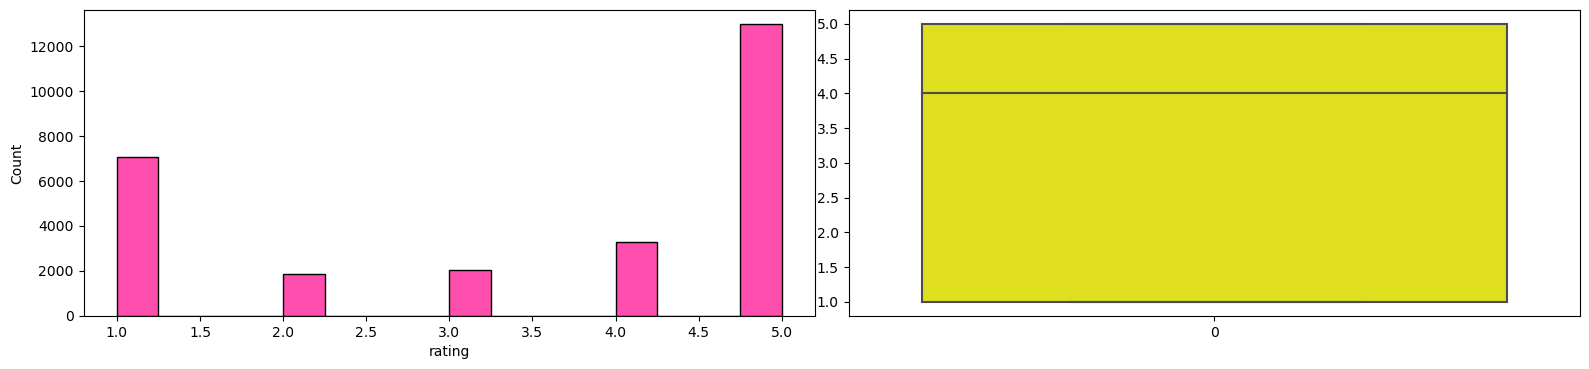

In [9]:
plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
sns.histplot(data['rating'],color='DeepPink')
plt.subplot(2,2,2)
sns.boxplot(data['rating'],color='yellow')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'helpfulVotes')

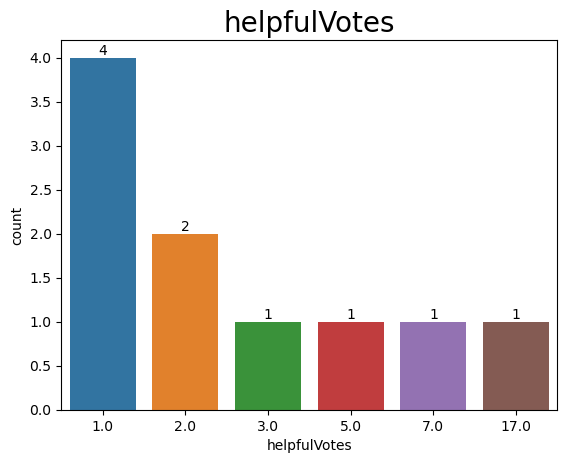

In [13]:
ax = sns.countplot(x='helpfulVotes', data=df)
ax.bar_label(ax.containers[0])
plt.title("helpfulVotes", fontsize=20)

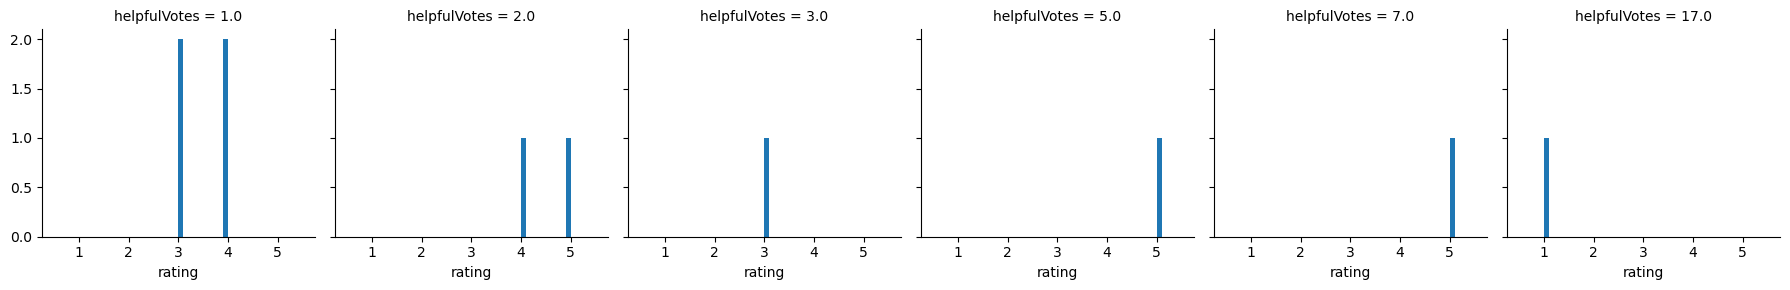

In [15]:
g = sns.FacetGrid(df, col="helpfulVotes")
g = g.map(plt.hist, "rating")

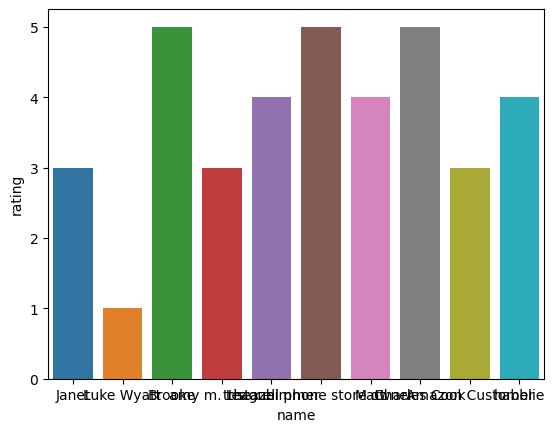

In [16]:
sns.barplot(y='rating',x='name',data=df)
plt.show()

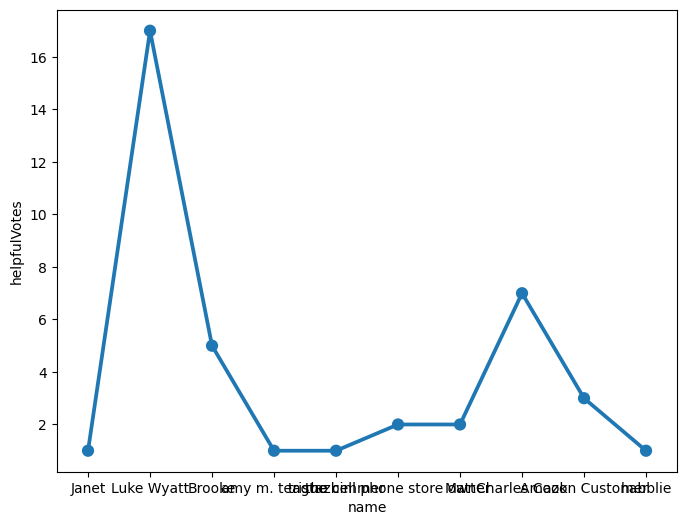

In [17]:
f, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(x="name", y="helpfulVotes", data=df)
plt.show()

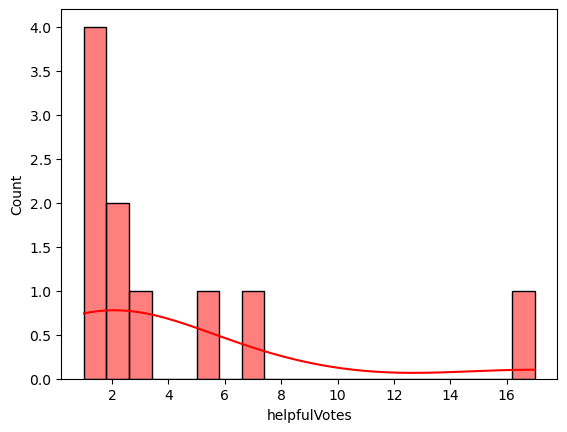

In [23]:
sns.histplot(df['helpfulVotes'],color="r",bins=20,kde=True,)
plt.show()

In [5]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

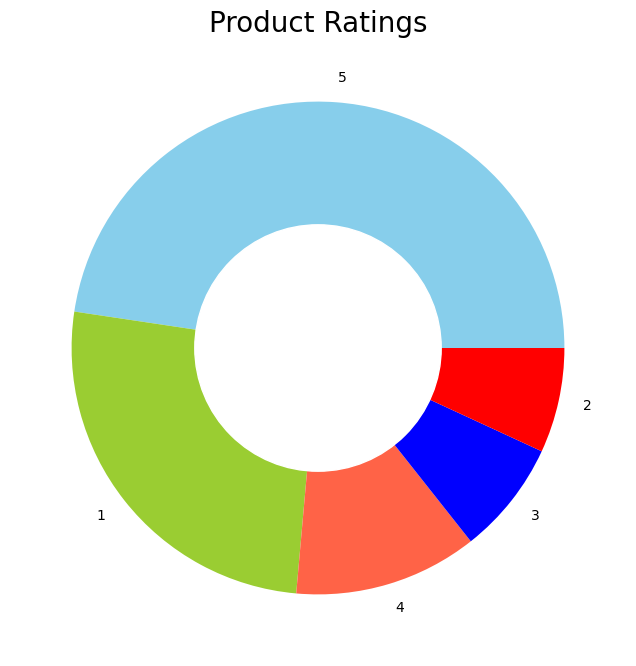

In [6]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Product Ratings", fontsize=20)
plt.show()

# Sentiment Analysis

In [ ]:
# sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["body"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["body"]]
print(data.head())

In [8]:
x = sum(data["Positive"])
y = sum(data["Negative"])

In [13]:
def sentiment_score(a, b):
    if (a>b) :
        print("Positive 😊 ")
    elif (b>a):
        print("Negative 😠 ")

In [14]:
sentiment_score(x, y)

Positive 😊 


In [15]:
print("Positive: ", x)
print("Negative: ", y)

Positive:  5022.301000000003
Negative:  1756.803999999994
